In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Position_Salaries.csv')

In [21]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values
print(x)
print

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [22]:
#we need to do feauture scailing as we dont have any equationsas we had in linear and also we need to tain svr modeln and do predictions
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [23]:
#step 1 convert y into 2-D array ar standard scale class need 2-D array
y=y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()#we need  to create 2 objects  as each object deal with mean which is different for x and y
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [25]:
x# we get scaled values i.e level

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [27]:
y#we get scaled values i.e Salaries scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [28]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
#WE HAVE KERNELS WHICH STUDY NON LINEAR AND LINEAR RELATION
#THERE ARE 9 KERNELS BUT WE USE Radial basis function
regressor.fit(x,y)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [30]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))#we need to convert the scailed value

array([[170370.0204065]])

Text(0, 0.5, 'salary')

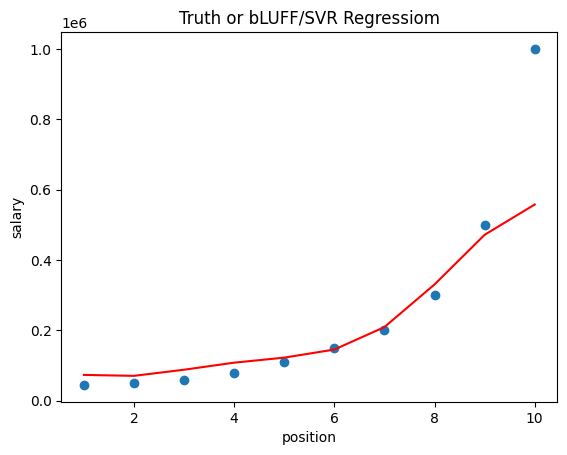

In [31]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y))
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='red')
plt.title('Truth or bLUFF/SVR Regressiom')#we need to not need to inverse X again in parameter of predict as it is inversed in x itself
plt.xlabel('position')
plt.ylabel('salary')